# **IMPORTING NECESSARY LIBRARIES**

In [2]:
!pip install lightgbm

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import ks_2samp
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns',None)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **LOADING THE DATA**

In [6]:
file_list = ['ARIMA','ETS','GARCH','LSTM','PROPHET','SARIMAX','STL']

In [7]:
df = pd.DataFrame()
file_path = "/content/drive/MyDrive/DataGenie Hackathon/Final Data 2/"
for file in file_list:
  data = pd.read_csv(file_path+file+".csv",header=0)
  df = pd.concat([df,data])
df.shape

(35000, 73)

In [8]:
add_columns=pd.read_csv('/content/drive/MyDrive/DataGenie Hackathon/Additional columns.csv',header=0)

In [9]:
df.reset_index(drop=True, inplace=True)
add_columns.reset_index(drop=True, inplace=True)
df= pd.concat([df,add_columns],axis=1)

# **BASIC ANALYSIS**

In [10]:
df.head()

,Mean,Median,Mode,Variance,Std Dev,Skewness,Kurtosis,Linear Regression Slope,25th Percentile,75th Percentile,Auto_Corr_Lag1,Auto_Corr_Lag2,Rolling_Mean,Rolling_Std_Dev,Seasonality Present,Seasonal Mean,Seasonal Variance,Seasonal Max,Seasonal Min,Seasonal 25th percentile,Seasonal 75th percentile,Trend Mean,Trend Variance,Trend Max,Trend Min,Trend 25th percentile,Trend 75th percentile,Residual Mean,Residual Variance,Residual Max,Residual Min,Residual 25th percentile,Residual 75th percentile,Seasonal Indices Mean,Seasonal Indices Variance,Seasonal Indices Max,Seasonal Indices Min,Seasonal Indices 25th percentile,Seasonal Indices 75th percentile,Mean Frequency,Median Frequency,Frequency Variance,Frequency Skewness,Frequency Kurtosis,Frequency 25th Percentile,Frequency 75th Percentile,Fequency Entropy Value,Fequency Peak Value,Frequency Delta Theta Ratio,Lag 1 Feature Correlation,First Order Difference Mean,First Order Difference Median,First Order Difference Variance,First Order Difference Skewness,First Order Difference Kurtosis,First Order Difference 25th Percentile,First Order Difference 75th Percentile,First Order Difference Entropy,Information Entropy,Sample Entropy,cA Coeffecients Mean,cA Coeffecients Variance,cA Coeffecients Max,cA Coeffecients Min,cA Coeffecients 25th percentile,cA Coeffecients 75th percentile,cD Coeffecients Mean,cD Coeffecients Variance,cD Coeffecients Max,cD Coeffecients Min,cD Coeffecients 25th percentile,cD Coeffecients 75th percentile,Label,acf_values_0,acf_values_1,acf_values_2,acf_values_3,acf_values_4,acf_values_5,pacf_values_0,pacf_values_1,pacf_values_2,pacf_values_3,pacf_values_4,pacf_values_5,num_acf_peaks,dominant_frequency,strength_of_seasonality_acf,has_multiple_seasonal_patterns,poly_coefficients_0,poly_coefficients_1,poly_coefficients_2,stationary,significant_acf_peaks,significant_pacf_peaks,residuals_normality_pvalue,lag1_correlation
0,-1.515825e-16,-0.005670,-1.799984,1.0,1.0,-0.000607,-1.191826,0.004604,-0.881812,0.854174,0.997203,0.995665,1.781521,0.060607,True,0.000454,0.004369,0.087890,-0.105152,-0.050218,0.075689,-0.000282,0.963351,1.681364,-1.683336,0,0,0.000040,0.002050,0.140845,-0.143777,0,0,3.469447e-18,0.004371,0.087890,-0.105152,-0.054634,0.053930,-0.000667,-0.000667,0.083333,-9.845595e-17,-1.200004,-0.250333,0.249,-1.797693e+308,0.001333,0,0.997203,0.004635,0.002962,0.005578,0.046792,0.062373,-0.043715,0.055588,-1.797693e+308,0.181526,0.181526,-7.579123e-17,1.997103,2.548054,-2.502719,-1.240145,1.195964,0.001682,0.002894,0.150659,-0.134876,-0.033897,0.037152,ARIMA,1.0,0.993185,0.987695,0.981183,0.975284,0.970126,1.0,0.994511,0.117316,-0.083676,0.033003,0.083953,5,1,0.993185,True,0.0,0.502421,-2.377591e-06,False,21,9,0.777654,0.997203
1,-2.273737e-16,0.014016,-1.797004,1.0,1.0,-0.001102,-1.180866,0.004603,-0.864500,0.882415,0.997230,0.995524,1.781381,0.058095,True,0.000475,0.004737,0.101232,-0.098527,-0.045572,0.083324,-0.000291,0.962010,1.685599,-1.700808,0,0,-0.000017,0.001911,0.118079,-0.129226,0,0,-1.734723e-18,0.004737,0.101232,-0.098527,-0.054930,0.052213,-0.000667,-0.000667,0.083333,-9.845595e-17,-1.200004,-0.250333,0.249,-1.797693e+308,0.001333,0,0.997230,0.004609,0.005615,0.005525,-0.061735,-0.209547,-0.044733,0.058620,-1.797693e+308,0.187175,0.187175,-3.031649e-16,1.997252,2.527062,-2.476881,-1.223739,1.235431,-0.002264,0.002743,0.166950,-0.133542,-0.039825,0.033790,ARIMA,1.0,0.993258,0.987517,0.981141,0.974870,0.969153,1.0,0.994584,0.088821,-0.054435,-0.003933,0.052205,5,1,0.993258,True,0.0,0.499507,-5.882517e-07,False,21,9,0.385805,0.997230
2,1.515825e-16,0.003725,-1.783919,1.0,1.0,-0.001376,-1.188064,0.004604,-0.862298,0.865452,0.997404,0.995522,1.787326,0.041846,True,0.000472,0.004522,0.097661,-0.089845,-0.048454,0.080767,-0.000394,0.961202,1.700341,-1.693938,0,0,-0.000031,0.001863,0.134956,-0.159589,0,0,1.156482e-18,0.004522,0.097661,-0.089845,-0.056682,0.057082,-0.000667,-0.000667,0.083333,-9.845595e-17,-1.200004,-0.250333,0.249,-1.797693e+308,-0.001333,0,0.99

In [12]:
print("Total Number of Rows in the Dataset: ",df.shape[0])
print("Total Number of Features in the Dataset: ",df.shape[1])

Total Number of Rows in the Dataset:  35000
Total Number of Features in the Dataset:  97


In [13]:
#List of columns in the dataset
print(df.columns.values)

['Mean' 'Median' 'Mode' 'Variance' 'Std Dev' 'Skewness' 'Kurtosis'
 'Linear Regression Slope' '25th Percentile' '75th Percentile'
 'Auto_Corr_Lag1' 'Auto_Corr_Lag2' 'Rolling_Mean' 'Rolling_Std_Dev'
 'Seasonality Present' 'Seasonal Mean' 'Seasonal Variance' 'Seasonal Max'
 'Seasonal Min' 'Seasonal 25th percentile' 'Seasonal 75th percentile'
 'Trend Mean' 'Trend Variance' 'Trend Max' 'Trend Min'
 'Trend 25th percentile' 'Trend 75th percentile' 'Residual Mean'
 'Residual Variance' 'Residual Max' 'Residual Min'
 'Residual 25th percentile' 'Residual 75th percentile'
 'Seasonal Indices Mean' 'Seasonal Indices Variance'
 'Seasonal Indices Max' 'Seasonal Indices Min'
 'Seasonal Indices 25th percentile' 'Seasonal Indices 75th percentile'
 'Mean Frequency' 'Median Frequency' 'Frequency Variance'
 'Frequency Skewness' 'Frequency Kurtosis' 'Frequency 25th Percentile'
 'Frequency 75th Percentile' 'Fequency Entropy Value'
 'Fequency Peak Value' 'Frequency Delta Theta Ratio'
 'Lag 1 Feature Correlati

## **FEATURE STATS**

In [11]:
df.describe()

,Mean,Median,Mode,Variance,Std Dev,Skewness,Kurtosis,Linear Regression Slope,25th Percentile,75th Percentile,Auto_Corr_Lag1,Auto_Corr_Lag2,Rolling_Mean,Rolling_Std_Dev,Seasonal Mean,Seasonal Variance,Seasonal Max,Seasonal Min,Seasonal 25th percentile,Seasonal 75th percentile,Trend Mean,Trend Variance,Trend Max,Trend Min,Trend 25th percentile,Trend 75th percentile,Residual Mean,Residual Variance,Residual Max,Residual Min,Residual 25th percentile,Residual 75th percentile,Seasonal Indices Mean,Seasonal Indices Variance,Seasonal Indices Max,Seasonal Indices Min,Seasonal Indices 25th percentile,Seasonal Indices 75th percentile,Mean Frequency,Median Frequency,Frequency Variance,Frequency Skewness,Frequency Kurtosis,Frequency 25th Percentile,Frequency 75th Percentile,Fequency Entropy Value,Fequency Peak Value,Frequency Delta Theta Ratio,Lag 1 Feature Correlation,First Order Difference Mean,First Order Difference Median,First Order Difference Variance,First Order Difference Skewness,First Order Difference Kurtosis,First Order Difference 25th Percentile,First Order Difference 75th Percentile,First Order Difference Entropy,Information Entropy,Sample Entropy,cA Coeffecients Mean,cA Coeffecients Variance,cA Coeffecients Max,cA Coeffecients Min,cA Coeffecients 25th percentile,cA Coeffecients 75th percentile,cD Coeffecients Mean,cD Coeffecients Variance,cD Coeffecients Max,cD Coeffecients Min,cD Coeffecients 25th percentile,cD Coeffecients 75th percentile,acf_values_0,acf_values_1,acf_values_2,acf_values_3,acf_values_4,acf_values_5,pacf_values_0,pacf_values_1,pacf_values_2,pacf_values_3,pacf_values_4,pacf_values_5,num_acf_peaks,dominant_frequency,strength_of_seasonality_acf,poly_coefficients_0,poly_coefficients_1,poly_coefficients_2,significant_acf_peaks,significant_pacf_peaks,residuals_normality_pvalue,lag1_correlation
count,3.500000e+04,35000.000000,35000.000000,3.500000e+04,3.500000e+04,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.0,35000.0,35000.000000,35000.000000,35000.000000,35000.000000,35000.0,35000.0,3.500000e+04,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,3.500000e+04,3.500000e+04,35000.000000,35000.000000,35000.000000,3.500000e+04,35000.000000,35000.0,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,3.500000e+04,35000.000000,35000.000000,3.500000e+04,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,3.500000e+04,35000.000000,35000.0,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.0,35000.0,35000.000000,35000.0,35000.000000,35000.000000,35000.000000,35000.000000,3.500000e+04,35000.000000
mean,4.185692e-21,-0.001977,-2.206561,1.000000e+00,1.000000e+00,0.001688,-0.497795,0.004664,-0.808355,0.810515,0.852360,0.848775,1.531717,0.219113,0.000326,0.008745,0.118293,-0.118295,-0.044182,0.074090,-0.000262,0.823446,1.607186,-1.610640,0.0,0.0,0.000005,0.130915,0.705787,-0.706737,0.0,0.0,4.585193e-20,0.008745,0.118293,-0.118295,-0.050752,0.050810,-0.000578,-0.000578,8.333311e-02,-5.463670e-17,-1.200006,-0.250191,0.249035,-inf,0.017183,0.0,0.852360,0.004858,0.000542,0.295061,0.115077,0.449512,-0.166097,0.173680,-inf,0.504779,0.504779,1.050727e-03,1.854356,2.806629,-2.787845,-1.104109,1.109989,-0.003311,0.147285,0.715988,-0.731070,-1.222757e-01,0.117104,1.0,0.987665,0.978129,0.968456,0.960555,0.954616,1.0,0.989195,0.086074,0.033316,0.089884,0.086164,5.0,1.0,0.987665,0.0,0.486454,0.000002,20.999286,6.877000,3.410561e-01,0.992556
std,1.749186e-16,0.019832,0.972235,1.767797e-16,7.080703e-17,0.188035,3.847981,0.002513,0.129705,0.132234,0.348480,0.347687,0.732528,0.591026,0.000416,0.0

The dataset generated is balanced and have equal number of data points corresponding to each and every model

ARIMA      5000
ETS        5000
GARCH      5000
LSTM       5000
PROPHET    5000
SARIMAX    5000
STL        5000
Name: Label, dtype: int64


<Axes: >

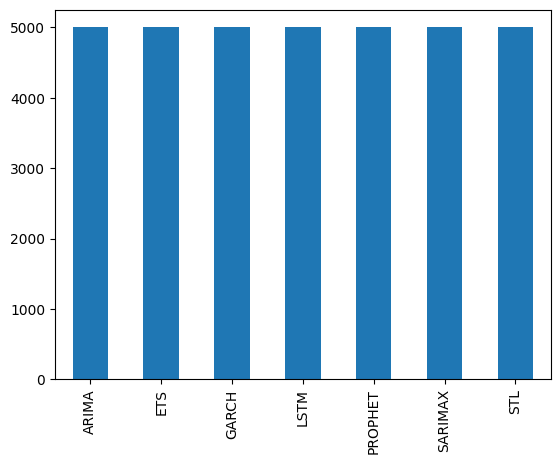

In [16]:
print(df.Label.value_counts())
df.Label.value_counts().plot(kind='bar')

In [13]:
df.isnull().sum()

Mean                          0
Median                        0
Mode                          0
Variance                      0
Std Dev                       0
                             ..
stationary                    0
significant_acf_peaks         0
significant_pacf_peaks        0
residuals_normality_pvalue    0
lag1_correlation              0
Length: 97, dtype: int64

#### **Comparison between features across time series models**

In [14]:
df.groupby('Label').mean()

,Mean,Median,Mode,Variance,Std Dev,Skewness,Kurtosis,Linear Regression Slope,25th Percentile,75th Percentile,Auto_Corr_Lag1,Auto_Corr_Lag2,Rolling_Mean,Rolling_Std_Dev,Seasonality Present,Seasonal Mean,Seasonal Variance,Seasonal Max,Seasonal Min,Seasonal 25th percentile,Seasonal 75th percentile,Trend Mean,Trend Variance,Trend Max,Trend Min,Trend 25th percentile,Trend 75th percentile,Residual Mean,Residual Variance,Residual Max,Residual Min,Residual 25th percentile,Residual 75th percentile,Seasonal Indices Mean,Seasonal Indices Variance,Seasonal Indices Max,Seasonal Indices Min,Seasonal Indices 25th percentile,Seasonal Indices 75th percentile,Mean Frequency,Median Frequency,Frequency Variance,Frequency Skewness,Frequency Kurtosis,Frequency 25th Percentile,Frequency 75th Percentile,Fequency Entropy Value,Fequency Peak Value,Frequency Delta Theta Ratio,Lag 1 Feature Correlation,First Order Difference Mean,First Order Difference Median,First Order Difference Variance,First Order Difference Skewness,First Order Difference Kurtosis,First Order Difference 25th Percentile,First Order Difference 75th Percentile,First Order Difference Entropy,Information Entropy,Sample Entropy,cA Coeffecients Mean,cA Coeffecients Variance,cA Coeffecients Max,cA Coeffecients Min,cA Coeffecients 25th percentile,cA Coeffecients 75th percentile,cD Coeffecients Mean,cD Coeffecients Variance,cD Coeffecients Max,cD Coeffecients Min,cD Coeffecients 25th percentile,cD Coeffecients 75th percentile,acf_values_0,acf_values_1,acf_values_2,acf_values_3,acf_values_4,acf_values_5,pacf_values_0,pacf_values_1,pacf_values_2,pacf_values_3,pacf_values_4,pacf_values_5,num_acf_peaks,dominant_frequency,strength_of_seasonality_acf,has_multiple_seasonal_patterns,poly_coefficients_0,poly_coefficients_1,poly_coefficients_2,stationary,significant_acf_peaks,significant_pacf_peaks,residuals_normality_pvalue,lag1_correlation
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARIMA,-2.531427e-18,-0.000486,-1.815216,1.0,1.0,0.002640,-1.184797,0.004604,-0.862464,0.861794,0.997309,0.995743,1.791871,0.044924,1.0,4.580637e-04,0.004269,0.092584,-0.092486,-0.049281,0.076345,-0.000455,0.962264,1.696533,-1.697830,0.0,0.0,-1.940757e-07,0.001902,0.137948,-0.137617,0.0,0.0,-2.411266e-20,0.004269,0.092584,-0.092486,-0.056041,0.056126,-0.000667,-0.000667,0.083333,-9.845595e-17,-1.200004,-0.250333,0.249000,NaN,0.000850,0.0,0.997309,0.004665,0.004685,0.005367,-0.001048,-0.072838,-0.045079,0.054450,NaN,0.180141,0.180141,-4.335258e-18,1.997304,2.562502,-2.519150,-1.218261,1.216926,-0.003352,0.002679,0.147235,-0.153847,-0.038444,0.031728,1.0,0.993236,0.987630,0.981517,0.975460,0.970020,1.0,0.994563,0.102294,-0.038893,-0.007679,0.056763,5.0,1.0,0.993236,1.0,0.0,0.498090,0.000003,0.0000,21.000,7.6972,0.496643,0.997309
ETS,2.986174e-18,-0.001118,-1.918082,1.0,1.0,0.005526,-1.147749,0.004566,-0.856299,0.854129,0.993567,0.983234,1.796643,0.088335,1.0,9.089879e-04,0.020889,0.237346,-0.237385,-0.079006,0.170220,-0.000915,0.946903,1.682851,-1.684006,0.0,0.0,-1.148279e-06,0.001874,0.136790,-0.136478,0.0,0.0,8.557969e-20,0.020890,0.237346,-0.237385,-0.101802,0.101908,-0.000667,-0.000667,0.083333,-9.845595e-17,-1.200004,-0.250333,0.249000,NaN,0.000826,0.0,0.993567,0.004584,-0.011495,0.012832,0.421892,-0.346086,-0.078502,0.080068,NaN,0.400804,0.400804,3.152915e-18,1.993561,2.703309,-2.646349,-1.209508,1.206510,-0.003283,0.006423,0.180908,-0.230549,-0.056707,0.055433,1.0,0.989649,0.975692,0.961509,0.951248,0.945208,1.0,0.990971,-0.207355,0.021345,0.217598,0.156738,5.0,1.0,0.989649,1.0,0.0,0.495794,0.000005,0.0000,21.000,9.1722,0.000021,0.993567
GARCH,3.262390e-19,0.000102,-4.125640,1.0,1.0,-0.001308,3.405696,0.000004,-0.563688,0.564084,0.000581,-0.001041,-0.004973,1.125629,1.0,4.741597e-06,0.014705,0.206488,-0.206470,-0.080789,0.080966,0.000070,0.078384,0.973242,-0.968443,0.0,0.0,3.370497e-05,0.893326,3.882441,-3.890230,0.0,0.0,2.568656e-20,0.014704,0.206488,-0.20647

In [17]:
label_encoder = LabelEncoder()

df['Label'] = label_encoder.fit_transform(df['Label'])

print("Encoded labels:", df['Label'])

Encoded labels: 0        0
1        0
2        0
3        0
4        0
        ..
34995    6
34996    6
34997    6
34998    6
34999    6
Name: Label, Length: 35000, dtype: int64


In [18]:
original_labels = label_encoder.inverse_transform([6])
print("Decoded labels:", original_labels)

Decoded labels: ['STL']


# **Generate Training and Testing Data**

In [19]:
X=df.drop('Label',axis=1)
y=df['Label']

In [20]:
X.shape

(35000, 96)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
def evaluate_classification_metrics(y_true, y_pred):
    ks_statistic, ks_p_value = ks_2samp(y_pred[y_true == 1], y_pred[y_true == 0])

    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    accuracy = accuracy_score(y_true, y_pred)

    metrics = {
        'KS Statistic': ks_statistic,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    }

    return metrics

# **TREE BASED CLASSIFER (LGBM)**

After analysis of multiple models the LGBM(Light Gradient Boosting models) performed better than others and it is also intuituve fora tree based classifier to perform well for such use cases since each model have their own characteristics and splitting the based on rules created on these features tend to provide good results compared to other models

In [32]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set the parameters for the LightGBM model (you can adjust these)
params = {
    'objective': 'multiclass',
    'num_class': len(set(y_train)),
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'num_leaves': 15,
    'max_depth' : 5,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

# Train the model
num_round = 100  # Number of boosting rounds
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions on the test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_max = [max(y_pred[i]) for i in range(len(y_pred))]

# Convert predicted probabilities to class labels
predicted_labels = [list(y_pred[i]).index(max(y_pred[i])) for i in range(len(y_pred))]

accuracy = accuracy_score(y_test, predicted_labels)
print(f'Accuracy: {accuracy}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17745
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 81
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.947988
[LightGBM] [Info] Start training from score -1.942980
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -1.940735
[LightGBM] [Info] Start training from score -1.263411
[LightGBM] [Info] Start training from score -1.941732
[LightGBM] [Info] Start training from score -1.935020
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

In [33]:
predicted_labels = pd.Series(predicted_labels,index=y_test.index)
evaluate_classification_metrics(y_test,predicted_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'KS Statistic': 1.0,
 'Precision': 0.7868943159714717,
 'Recall': 0.8577142857142858,
 'F1 Score': 0.8104294372294373,
 'Accuracy': 0.8577142857142858}

In [46]:
feature_importance = bst.feature_importance()

# Map feature importance values to feature names
feature_names = X.columns
feature_importance_map = dict(zip(feature_names, feature_importance))
feature_importance_map =  pd.DataFrame.from_dict(feature_importance_map,orient='index',columns=['Importance'])
feature_importance_map = feature_importance_map.sort_values('Importance',ascending=False)
feature_importance_map.head(30)

,Importance
pacf_values_4,762
Residual Variance,637
Linear Regression Slope,591
pacf_values_3,588
Trend Max,547
Seasonal Variance,369
Trend Mean,317
Seasonal Mean,277
Rolling_Mean,275
pacf_values_2,270


We could see that PACF features, Linear Trend Based features, residual Variance and Seasonality varuiables paly a major role in detecting which time series model is the best model. Hence the model seems to be intuitive

In [43]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  plt.xticks(rotation=45)
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(feature_importance_map, *['Importance'], **{})
chart

In [44]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(feature_importance_map, *['Importance'], **{})
chart

In [38]:
import joblib
joblib.dump(bst, 'lgbm_model.pkl')

['lgbm_model.pkl']

This model can be pickled and used for classification in the backend to decide which model is the best